In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


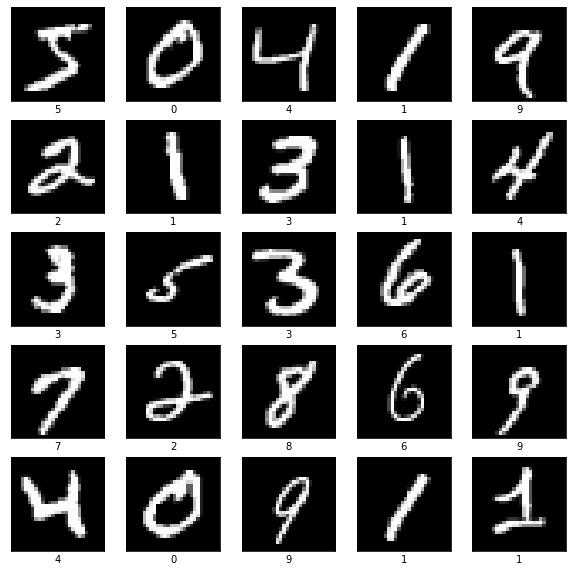

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# sequential model construction
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=5, filters=128, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))

# Flatten
model.add(Flatten())

# 512 개 노드 가지는 Dense
model.add(Dense(128, activation='relu'))

# 출력층
model.add(Dense(10, activation='softmax'))

In [6]:
# model compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,216,010
Trainable params: 3,216,010
Non-trainable params: 0
_________________________________________________________________


In [9]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, batch_size=50, epochs=50, validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
1200/1200 [==============================] - 37s 5ms/step - loss: 0.1190 - accuracy: 0.9629 - val_loss: 0.0557 - val_accuracy: 0.9812
Epoch 2/50
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0391 - accuracy: 0.9879 - val_loss: 0.0421 - val_accuracy: 0.9861
Epoch 3/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0354 - val_accuracy: 0.9888
Epoch 4/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.0359 - val_accuracy: 0.9883
Epoch 5/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0378 - val_accuracy: 0.9896
Epoch 6/50
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0365 - val_accuracy: 0.9896
Epoch 7/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0457 - val_accuracy

In [10]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1411 - accuracy: 0.9883


[0.14110229909420013, 0.9883000254631042]

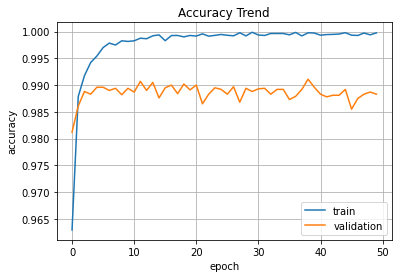

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

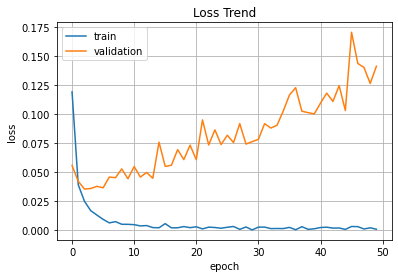

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()